<a href="https://colab.research.google.com/github/driisss/algorithm1/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       AveRooms
0          41.0
1          21.0
2          52.0
3          52.0
4          52.0
...         ...
20635      25.0
20636      18.0
20637      17.0
20638      18.0
20639      16.0

[20640 rows x 1 columns]

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: MedHouseVal, Length: 20640, dtype: float64
Intercept (β₀): 179119.91658938478
Slope (β₁): 968.449639742756


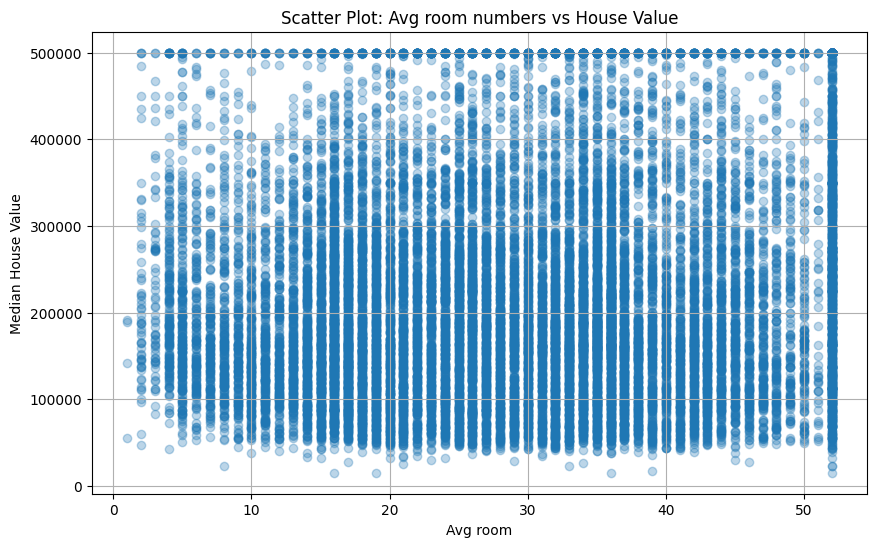

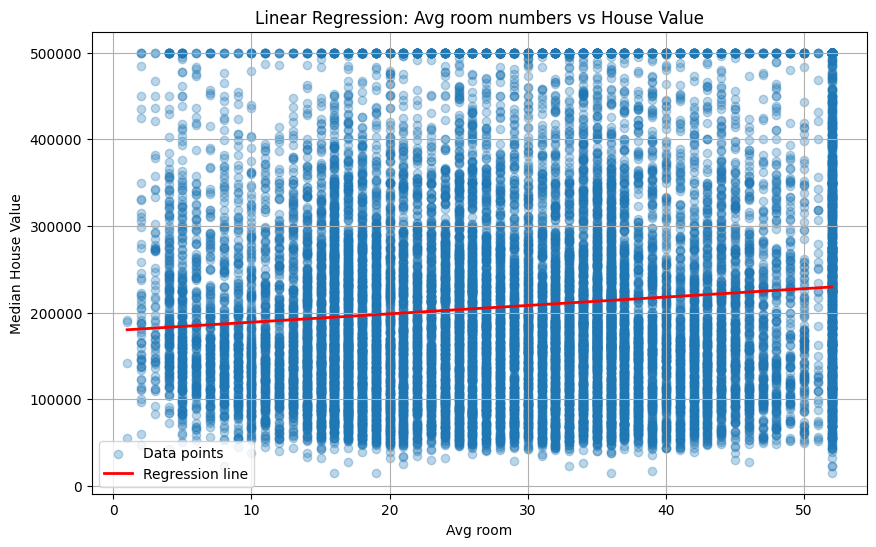

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Column names
column_names = [
    "MedInc", "HouseAge", "AveRooms", "AveBedrms",
    "Population", "AveOccup", "Latitude", "Longitude", "MedHouseVal"
]

# Load the .data file
df = pd.read_csv("/content/sample_data/cal_housing.data", header=None, names=column_names)


# Select one feature and the target
X = df[["AveRooms"]]          # Feature (must be 2D for scikit-learn)
y = df["MedHouseVal"]

print(X)
print()
print(y)

# Train the model
model = LinearRegression()
model.fit(X, y)

print("Intercept (β₀):", model.intercept_)
print("Slope (β₁):", model.coef_[0])

# Create line for model
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_df = pd.DataFrame(X_line, columns=["AveRooms"])
y_line = model.predict(X_line_df)

# --- First Figure: Only Scatter Plot ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label="Data points")
plt.xlabel("Avg room")
plt.ylabel("Median House Value")
plt.title("Scatter Plot: Avg room numbers vs House Value")
plt.grid(True)
plt.show()

# --- Second Figure: Scatter Plot with Regression Line ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.3, label="Data points")
plt.plot(X_line, y_line, color="red", linewidth=2, label="Regression line")
plt.xlabel("Avg room")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Avg room numbers vs House Value")
plt.legend()
plt.grid(True)
plt.show()

# --- Predict from user input ---
try:
    input_value = float(input("Enter average number of rooms: "))
    input_df = pd.DataFrame([[input_value]], columns=["AveRooms"])  # Match the training column name
    prediction = model.predict(input_df)
    print(f"Predicted Median House Value: ${prediction[0]:,.2f}")
except ValueError:
    print("Invalid input. Please enter a numeric value.")
